In [1]:
!pip install -r ../requirements.txt

In [258]:
import pandas as pd
from data.parliamentApiHelpers import ParliamentAPI
from data.generateJson import get_links
from matplotlib import pyplot as plt
import networkx as nx
import matplotlib as plt

In [259]:
coalition = "52"
data_folder = f"../coalition_{coalition}"

In [260]:
df_votes = pd.read_parquet(f"{data_folder}/votes.parquet")
df_voters = pd.read_parquet(f"{data_folder}/voters.parquet")
df_vote_metadata = pd.read_parquet(f"{data_folder}/metadata.parquet")

In [261]:
df_vote_metadata = df_vote_metadata[(df_vote_metadata.date < "2023-03-05")]
df_votes = df_votes.loc[df_vote_metadata.index]
voter_id_to_name = df_voters["name"].to_dict()

In [262]:
adj_matrix = ParliamentAPI.generate_adjacency_matrix(df_votes, "jaccards", ["POOLT", "VASTU", "ERAPOOLETU"])

In [263]:
df_links = get_links(adj_matrix).sort_values(by="value", ascending=False)

In [264]:
df_fractions = pd.read_parquet("../fractions.parquet")
df_fractions = df_fractions[df_fractions.shortName.notna()]
e200_id = "e4bf6970-f928-4230-961c-615cc54118f9"
df_fractions.loc[e200_id, "colorHex"] = "#008080"

In [265]:
#df_links = (pd
#            .read_json(f"{data_folder}/links.json")
#            .sort_values(by="value", ascending=False)
#            )

In [266]:
def merge_components(components, source, target):
    source_c =  set([c for c in components if source in c][0])
    target_c = [c for c in components if target in c][0]
    remaining_component = [c for c in components if c != source_c and c!= target_c]
    new_c = source_c.union(target_c)
    remaining_component.append(new_c)
    return remaining_component, new_c
all_components = [set([a]) for a in set(df_links.source).intersection(set(df_links.target))]

In [267]:
new_links = []

In [268]:
i = 0
while len(all_components) > 1:
    print(i, len(all_components))

    top_link = df_links.iloc[0]
    source = top_link.source
    target = top_link.target
    value = top_link.value
    print(f"{voter_id_to_name[source]}:{voter_id_to_name[target]}:{value}")
    new_links.append(top_link)
    # merge source and value
    all_components, created_component = merge_components(all_components, source, target)
    # filter df_links so that source and target cannot be both in the created component
    df_links = df_links[~(df_links.source.isin(created_component) & df_links.target.isin(created_component))].sort_values(by="value", ascending=False)

    i+=1
new_links = pd.DataFrame(new_links)
all_nodes = set(df_links.source)
new_links = new_links[new_links["value"] > 0]
new_links["value_inv"] = 1/new_links["value"]

0 156
Lauri Läänemets:Hanno Pevkur:1.0
1 155
Urmas Reinsalu:Riina Sikkut:1.0
2 154
Riina Sikkut:Lauri Läänemets:1.0
3 153
Aivar Viidik:Tiiu Aro:1.0
4 152
Aivar Sõerd:Sulev Kannimäe:0.9403409090909091
5 151
Aivar Sõerd:Urve Tiidus:0.9269662921348315
6 150
Aivar Sõerd:Kristen Michal:0.9232954545454546
7 149
Siim Kallas:Aivar Sõerd:0.9171428571428571
8 148
Urve Tiidus:Toomas Jürgenstein:0.9134078212290503
9 147
Urve Tiidus:Andrus Seeme:0.9119318181818182
10 146
Andres Sutt:Urve Tiidus:0.9088319088319088
11 145
Maris Lauri:Urve Tiidus:0.8825214899713467
12 144
Toomas Järveoja:Urve Tiidus:0.8810198300283286
13 143
Signe Kivi:Sulev Kannimäe:0.8685714285714285
14 142
Urve Tiidus:Kristina Šmigun-Vähi:0.8664772727272727
15 141
Siim Kallas:Timo Suslov:0.8604651162790697
16 140
Sulev Kannimäe:Margit Sutrop:0.8567335243553008
17 139
Heiki Hepner:Sulev Kannimäe:0.851123595505618
18 138
Õnne Pillak:Marko Torm:0.8490566037735849
19 137
Andrus Seeme:Priit Sibul:0.8443804034582133
20 136
Sulev Kannimäe

In [269]:
df_voters

,name,faction,factionId
6b45cfb5-8a17-481c-b674-80fc00c6cf5d,Jaak Aab,Eesti Keskerakonna fraktsioon,3c1832c0-7727-18d1-d9d3-e685a58f44b0
d8909ed8-ac93-4223-a3ec-55e1bb4ec8a9,Merry Aart,Eesti Konservatiivse Rahvaerakonna fraktsioon,d4e90963-1d10-4f8a-bf37-a99ca8531ff3
9f3d840c-3a49-43de-8c5d-d1990933b692,Taavi Aas,Eesti Keskerakonna fraktsioon,3c1832c0-7727-18d1-d9d3-e685a58f44b0
7655e8d3-b658-49f0-8e09-f6cbc4a2c714,Annely Akkermann,Eesti Reformierakonna fraktsioon,8772fd6f-3197-6a53-2ffc-8c4d63407d1e
90074aa2-4938-41a9-8275-3a6efa1cee31,Yoko Alender,Eesti Reformierakonna fraktsioon,8772fd6f-3197-6a53-2ffc-8c4d63407d1e
...,...,...,...
db788688-d7a6-4af8-8cee-3004adb948f5,Margus Tsahkna,Eesti 200 fraktsioon,e4bf6970-f928-4230-961c-615cc54118f9
fe6fcd51-6911-4dc6-9232-ddeac5ec1155,Aleksandr Tšaplõgin,Eesti Keskerakonna fraktsioon,3c1832c0-7727-18d1-d9d3-e685a58f44b0
d0d7a6a5-25de-40d0-b5df-09575a7c9bfc,Toomas Uibo,Eesti 200 fraktsioon,e4bf6970-f928-4230-961c-615cc54118f9
1600fe77-4b45-44ab-972a-181a5ef71767,Kristo Enn Vaga,Eesti Reformierakonna fraktsioon,8772fd6f-3197-6a53-2ffc-8c4d63407d1e


In [270]:
new_links

,source,target,value,value_inv
7809,d557812c-971d-415b-827d-aa6a382ec6ef,cf42a56a-b91a-4a51-913b-a489305326a2,1.000000,1.000000
11243,a78027e5-2480-49f2-a340-ee88daf92d53,76c477e6-4b49-4d49-ad7b-a4853182a1da,1.000000,1.000000
13070,76c477e6-4b49-4d49-ad7b-a4853182a1da,d557812c-971d-415b-827d-aa6a382ec6ef,1.000000,1.000000
15040,576e5358-efd7-4993-8945-f5e9aad48856,c26f94dc-bc04-4c46-8f30-d8611f5854b0,1.000000,1.000000
13666,5650dddf-f2ca-4b94-8888-e7482808f81b,9ca053df-1f4a-478f-8fe6-a4c7e3c5a218,0.940341,1.063444
...,...,...,...,...
5679,e6416c11-b0c5-459a-96f9-c9549bbaaa81,149dab3f-f850-4eb3-bf03-0890ce9090c1,0.324561,3.081081
11506,ce3f9ed0-083c-4d0f-b45a-096610012b5f,e6416c11-b0c5-459a-96f9-c9549bbaaa81,0.312500,3.200000
546,7655e8d3-b658-49f0-8e09-f6cbc4a2c714,4c3d9559-69ad-4e75-a188-94eae98786fd,0.290123,3.446809
1494,07132cc4-5afc-4edb-9537-7c721ec39b2d,149dab3f-f850-4eb3-bf03-0890ce9090c1,0.262357,3.811594


In [271]:
df_fractions

,name,active,link,shortName,colorHex,secretariatName
uuid,,,,,,
e4bf6970-f928-4230-961c-615cc54118f9,Eesti 200 fraktsioon,True,https://api.riigikogu.ee/api/usergroups/e4bf69...,E200,#008080,Eesti 200 fraktsiooni sekretariaat
3c1832c0-7727-18d1-d9d3-e685a58f44b0,Eesti Keskerakonna fraktsioon,True,https://api.riigikogu.ee/api/usergroups/3c1832...,KESK,#3bac7b,Eesti Keskerakonna fraktsiooni sekretariaat
d4e90963-1d10-4f8a-bf37-a99ca8531ff3,Eesti Konservatiivse Rahvaerakonna fraktsioon,True,https://api.riigikogu.ee/api/usergroups/d4e909...,EKRE,#2a3da0,Eesti Konservatiivse Rahvaerakonna fraktsiooni...
8772fd6f-3197-6a53-2ffc-8c4d63407d1e,Eesti Reformierakonna fraktsioon,True,https://api.riigikogu.ee/api/usergroups/8772fd...,REF,#ffc000,Eesti Reformierakonna fraktsiooni sekretariaat
2faa5389-46c8-4dfd-ac8a-5a9b498912c4,Eesti Vabaerakonna fraktsioon,False,https://api.riigikogu.ee/api/usergroups/2faa53...,EVA,#1569c7,Eesti Vabaerakonna fraktsiooni sekretariaat
c99e4e31-617c-49ad-bfa6-814736842182,Fraktsiooni mittekuuluvad Riigikogu liikmed,True,https://api.riigikogu.ee/api/usergroups/c99e4e...,MITTEKUULUVAD,#c0c0c0,None
a844d128-287d-4c20-bf30-61fcb0af23cf,Isamaa fraktsioon,True,https://api.riigikogu.ee/api/usergroups/a844d1...,I,#6fabd4,Isamaa fraktsiooni sekretariaat
fdceab88-5c4e-a7f3-43cc-b8c45b179038,Isamaa ja Res Publica Liidu fraktsioon,False,https://api.riigikogu.ee/api/usergroups/fdceab...,IRL,#6fabd4,Isamaa ja Res Publica Liidu fraktsiooni sekret...
d188e268-5d01-7e93-0c22-3ae7f0c1e851,Sotsiaaldemokraatliku Erakonna fraktsioon,True,https://api.riigikogu.ee/api/usergroups/d188e2...,SDE,#e35558,Sotsiaaldemokraatliku Erakonna fraktsiooni sek...


In [272]:
# new_links[["source", "target", "value"]].values.tolist()

In [273]:
G = nx.from_pandas_edgelist(new_links, source="source", target="target", edge_attr=True)

In [280]:
color = [df_fractions.loc[df_voters.loc[node]["factionId"]]["colorHex"] for node in G.nodes()]
width = 4*new_links.value

In [284]:
pd.Series({voter_id_to_name[k]:v for k,v in dict(G.degree()).items()}).sort_values(ascending=False)

Urve Tiidus                   10
Uno Kaskpeit                   8
Aivar Sõerd                    7
Sulev Kannimäe                 7
Jaanus Karilaid                6
                              ..
Alar Laneman                   1
Ivari Padar                    1
Jürgen Ligi                    1
Marko Torm                     1
Viktoria Ladõnskaja-Kubits     1
Length: 107, dtype: int64

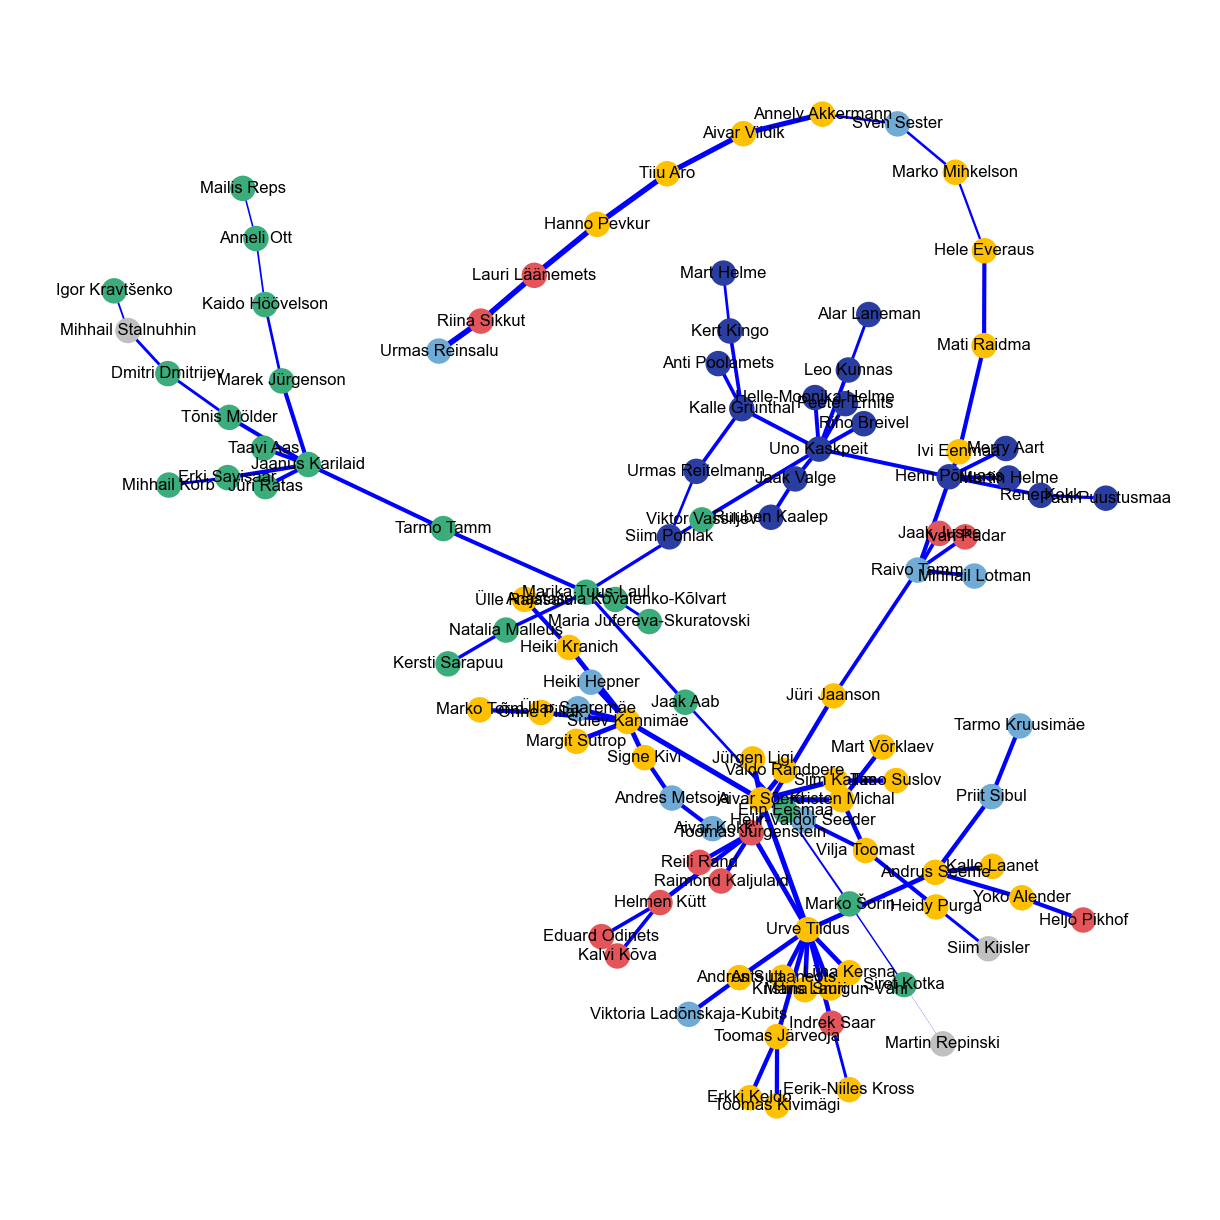

In [285]:
plt.rcParams['figure.figsize'] = [12, 12]
nx.draw(G, node_color=color, width=width, edge_color='b', labels={k:v for k,v in df_voters["name"].to_dict().items() if (k in new_links.source.values or k in new_links.target.values)})